# DATA ANALYSIS HEARTH.TXT

Author:  Ricardo Vallejo


## 1. Data Presentation

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import statistics
import numpy as np
import scipy.stats
import seaborn as sns



tit = pd.read_table("C:\wrkOrion3\IACollege\DataProcess\heart.txt")
pd.options.display.max_columns = None
tit.head(10)

,age,sexe,type_douleur,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,70,masculin,D,130,322,A,C,109,non,2.4,2,D,presence
1,67,feminin,C,115,564,A,C,160,non,1.6,2,A,absence
2,57,masculin,B,124,261,A,A,141,non,0.3,1,A,presence
3,64,masculin,D,128,263,A,A,105,oui,0.2,2,B,absence
4,74,feminin,B,120,269,A,C,121,oui,0.2,1,B,absence
5,65,masculin,D,120,177,A,A,140,non,0.4,1,A,absence
6,56,masculin,C,130,256,B,C,142,oui,0.6,2,B,presence
7,59,masculin,D,110,239,A,C,142,oui,1.2,2,B,presence
8,60,masculin,D,140,293,A,C,170,non,1.2,2,C,presence
9,63,feminin,D,150,407,A,C,154,non,4.0,2,D,presence


### 1.1. Data Categories

### 1.2. Data Types

In [12]:
t1 = tit['age'].dtypes
print(t1)

int64


In [13]:
tit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           270 non-null    int64  
 1   sexe          270 non-null    object 
 2   type_douleur  270 non-null    object 
 3   pression      270 non-null    int64  
 4   cholester     270 non-null    int64  
 5   sucre         270 non-null    object 
 6   electro       270 non-null    object 
 7   taux_max      270 non-null    int64  
 8   angine        270 non-null    object 
 9   depression    270 non-null    float64
 10  pic           270 non-null    int64  
 11  vaisseau      270 non-null    object 
 12  coeur         270 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 27.5+ KB


In [17]:
print("Data samplesof population: ", tit.count())

Data samplesof population:  age             270
sexe            270
type_douleur    270
pression        270
cholester       270
sucre           270
electro         270
taux_max        270
angine          270
depression      270
pic             270
vaisseau        270
coeur           270
dtype: int64


# 2.  Analysis qualitative variable - Pain Type

In [15]:
E1 = tit['type_douleur'].value_counts()
print(E1)

D    129
C     79
B     42
A     20
Name: type_douleur, dtype: int64


In [21]:
E2 = tit['type_douleur'].value_counts(normalize=True) * 100
print (E2)

D    47.777778
C    29.259259
B    15.555556
A     7.407407
Name: type_douleur, dtype: float64


In [23]:
Modalites = tit['type_douleur'].unique()
print("Modalites ", Modalites)

Modalites  ['D' 'C' 'B' 'A']


## 2.1 Graphical representation 

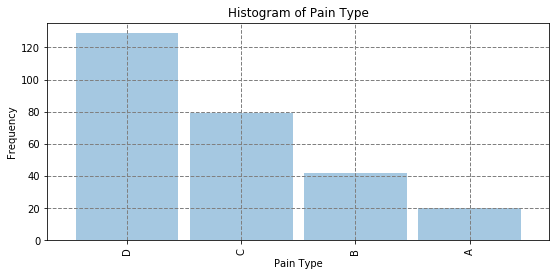

In [34]:
E1.plot(kind = 'bar',
           stacked = 'True',          # Muestra las barras apiladas
           alpha = 0.4,               # nivel de transparencia
           width = 0.9,               # Grosor de las barras para dejar espacio entre ellas
           figsize=(9,4));

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.title('Histogram of Pain Type')
plt.xlabel("Pain Type")
plt.ylabel("Frequency")
plt.show()


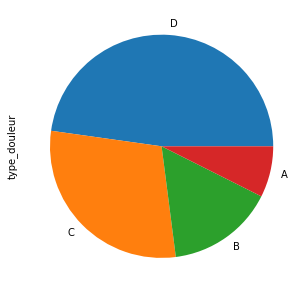

In [42]:
# Simple PIE Graphic

E1.plot.pie(subplots=True, figsize = (5,5))
plt.show() #ok


Text(0.5, 1.0, 'Circular diagram of Pain Type')

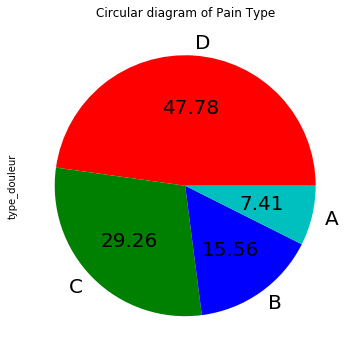

In [82]:
# Advanced PIE Graphic
E1.plot.pie(labels=tit['type_douleur'].unique(), 
            colors=['r', 'g', 'b', 'c'], 
            autopct='%.2f', 
            fontsize=20,
            figsize=(6, 6), 
            subplots=True)
plt.title('Circular diagram of Pain Type')

## 2.2 Relationships between Qualitatives (categorical) variables

### 2.2.1  Relationship between type of pain and sexe.

Text(0.5, 1.0, 'Relationship between sex and type de douleur')

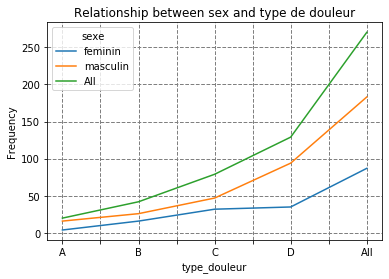

In [99]:
pd.crosstab(index=tit['type_douleur'],
            columns=tit['sexe'], 
            margins=True).plot(kind='line')

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Frequency")
plt.title('Relationship between sex and type de douleur')

### 2.2.1  Relationship between sexe of hearth affections

Text(0.5, 1.0, 'Relationship between sex and type de hearth affection presence')

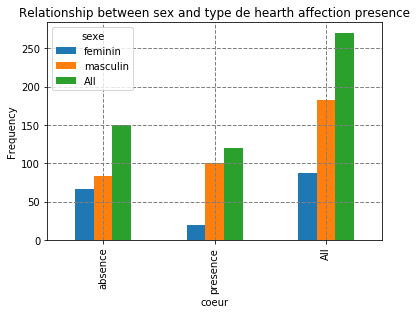

In [105]:
pd.crosstab(index=tit['coeur'],
            columns=tit['sexe'], 
            margins=True).plot(kind='bar')

plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Frequency")
plt.title('Relationship between sex and type de hearth affection presence')

In [135]:
# applying value_counts with default parameters - https://re-thought.com/pandas-value_counts/
tit['sexe'].value_counts().to_frame()

,sexe
masculin,183
feminin,87


In [137]:
tit['coeur'].value_counts().to_frame()

,coeur
absence,150
presence,120


In [138]:
tit['type_douleur'].value_counts().to_frame()   

,type_douleur
D,129
C,79
B,42
A,20


In [148]:
  tit.groupby('type_douleur')['sexe'].value_counts().to_frame()

sexe
type_douleur sexe          
A            masculin    16
             feminin      4
B            masculin    26
             feminin     16
C            masculin    47
             feminin     32
D            masculin    94
             feminin     35

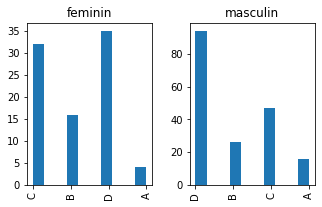

In [184]:
tit.hist(column='type_douleur', by="sexe", figsize=(5,3)) #10 pour default bins
plt.show() #ok

# 3. Analysis qualitative variable - Cholester

In [ ]:
tit.hist(column='type_douleur', by="sexe", figsize=(5,3)) #10 pour default bins
plt.show() #ok

## 3.1. Basic statistics of cholesterol

In [205]:
meanData = tit.mean()
print(meanData)


age            54.433333
pression      131.344444
cholester     249.659259
taux_max      149.677778
depression      1.050000
pic             1.585185
dtype: float64


In [235]:
meanCholesterol = tit['cholester'].mean() #https://realpython.com/python-statistics/
print("mean Cholester",meanCholesterol)

mean Cholester 249.65925925925927


In [167]:
maxValue = tit['cholester'].max()
print("max Cholester\n",maxValue)

564


In [168]:
modeValue = tit['cholester'].mode()
print("mode Cholester\n", modeValue)  #More frequent data

0    234
dtype: int64


In [237]:
#The standard deviation is a common method for numerically describing the distribution of a variable.

stdCholesterol = tit['cholester'].std()
print("sigma Cholester\n", stdCholesterol)

sigma Cholester
 51.68623711643128


In [230]:
medianValue = tit.median()
print ("Median\n", medianValue)

Median
 age            55.0
pression      130.0
cholester     245.0
taux_max      153.5
depression      0.8
pic             2.0
dtype: float64


In [219]:
varianceValue = tit.var() #The variance uses the difference between each value and its arithmetic mean. 
print("variance\n", varianceValue)

variance
 age             82.975093
pression       319.037051
cholester     2671.467107
taux_max       536.650434
depression       1.311506
pic              0.377475
dtype: float64


In [165]:
cholester_description = tit['cholester'].describe()
print(cholester_description)

count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: cholester, dtype: float64


In [166]:
cholester_description2 = tit['cholester'].describe(percentiles=[.10, .30, .65, .80])
print(cholester_description2)

count    270.000000
mean     249.659259
std       51.686237
min      126.000000
10%      194.800000
30%      221.700000
50%      245.000000
65%      264.850000
80%      288.200000
max      564.000000
Name: cholester, dtype: float64


In [178]:
#Quartiles
q1 = tit['cholester'].quantile(0.10)
print(q1)

194.8


## 3.2. Graphical representation and frequency analysis

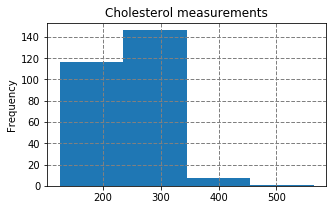

In [200]:
tit.hist(column='cholester', figsize=(5,3), bins=4)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Frequency")
plt.title('Cholesterol measurements')
plt.show() #ok

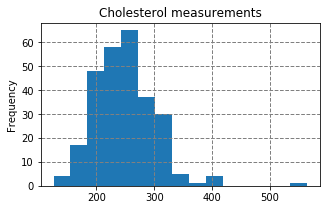

In [197]:
tit.hist(column='cholester', figsize=(5,3), bins=15)
plt.grid(color='gray', linestyle='--', linewidth=1)
plt.ylabel("Frequency")
plt.title('Cholesterol measurements')
plt.show() #ok

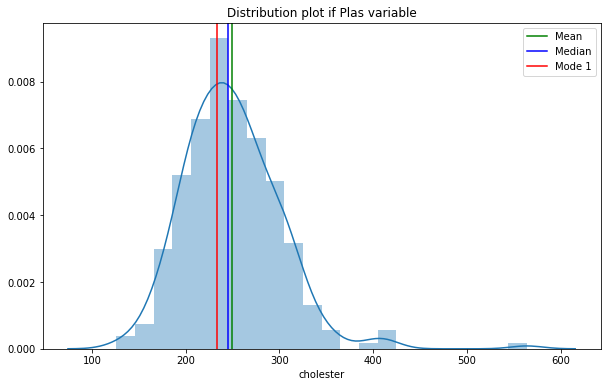

In [217]:
mean=tit['cholester'].mean();
median=tit['cholester'].median();
mode=tit['cholester'].mode();
fig, ax = plt.subplots(figsize=(10,6));

sns.distplot(tit['cholester']);
plt.title('Distribution Cholesterol variable');
plt.axvline(mean,color='green',label='Mean'); 
plt.axvline(median,color='blue',label='Median');
plt.axvline(mode[0],color='red',label='Mode 1')

plt.legend();

## 3.2. Graphical representation and dispersion analysis

In [ ]:
Boxplots
Boxplots use the 5-number summary (minimum and maximum values with the three quartiles) 
to illustrate the center, spread, and distribution of your data. 

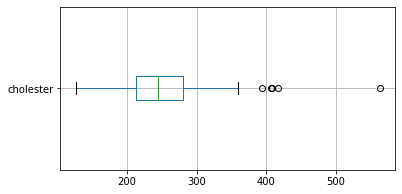

In [225]:
#Diagram de moustache
tit.boxplot(column='cholester', figsize=(6,3), vert=False) #Vert cest verticale
plt.show()

In [228]:
#Factor de aplatissemnet - Measure de concentration de donnes
skew1 = tit['cholester'].skew(axis = 0, skipna = True)
print("Skewness: \n", skew1)

kurt1 = tit['cholester'].kurt(axis = 0, skipna = True)
print("Kurtosis: \n", kurt1)


Skewness: 
 1.1837208885656836
Kurtosis: 
 4.895598990181746


In [241]:
Right skewenees  